<a href="https://colab.research.google.com/github/MathAugusto/finance-and-time-series/blob/main/Time_Series_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SÉRIES TEMPORAIS COM PYTHON**


## **ANÁLISE EXPLORATÓRIA E VISUALIZAÇÃO**

In [1]:
# import das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio as ply
import cufflinks as cf
from datetime import datetime
%matplotlib inline
sns.set_style("whitegrid")

# converters para uso do  matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
dados = pd.read_csv("AirPassengers.csv")
dados.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#tipos de dados
print(dados.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
# Conversão do obejto mês para um datetime:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dados = pd.read_csv("AirPassengers.csv", parse_dates = ['Month'],
                    index_col = 'Month', date_parser = dateparse)
dados


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
dados.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
# variavel da serie temporal 
ts = dados['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
# visualização de registro específico por index:
ts[0]

112

In [8]:
# visualização de registro específico por datetime:
ts[datetime(1949,2,1)]

118

In [9]:
# visualização de registro por ano:
ts["1950"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [10]:
# visualização de intervalos de registro:
ts["1949-2-1":"1949-10-1"]

Month
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

Text(0, 0.5, 'No. de Passageiros')

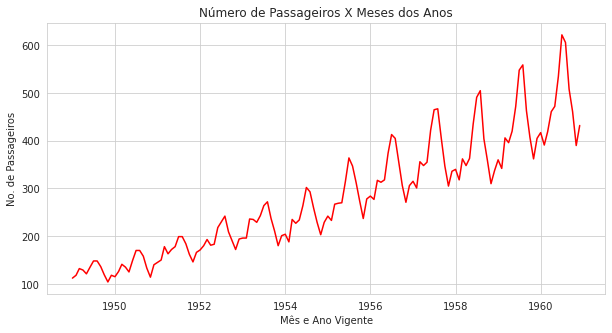

In [11]:
# Visualização total dos dados do conjunto:
fig = plt.figure(figsize=(10,5))
plt.plot(ts, color="red")
plt.title("Número de Passageiros X Meses dos Anos")
plt.xlabel("Mês e Ano Vigente")
plt.ylabel("No. de Passageiros")

Text(0, 0.5, 'No. de Passageiros')

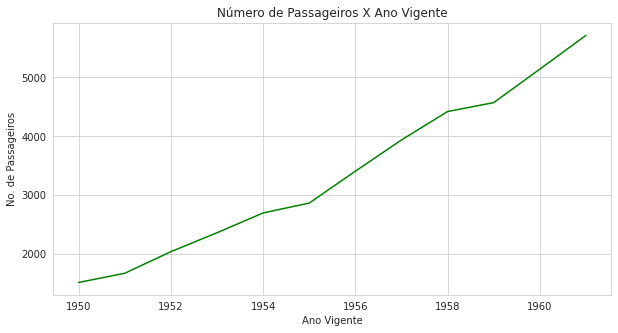

In [12]:
# Visualização por ANO dos dados do conjunto:
ts_ano = ts.resample("A").sum()
fig = plt.figure(figsize=(10,5))
plt.plot(ts_ano, color="green")
plt.title("Número de Passageiros X Ano Vigente")
plt.xlabel("Ano Vigente")
plt.ylabel("No. de Passageiros")

Text(0, 0.5, ' Soma do No. de Passageiros por MÊS')

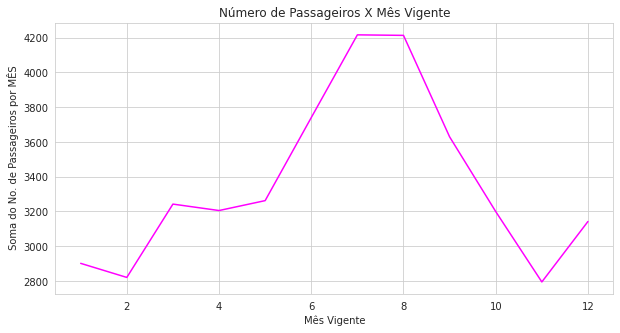

In [13]:
# Visualização por MÊS dos dados do conjunto:
ts_mes = ts.groupby([lambda x: x.month]).sum()
fig = plt.figure(figsize=(10,5))
plt.plot(ts_mes, color="magenta")
plt.title("Número de Passageiros X Mês Vigente")
plt.xlabel("Mês Vigente")
plt.ylabel(" Soma do No. de Passageiros por MÊS")

Text(0, 0.5, ' No. de Passageiros por mês')

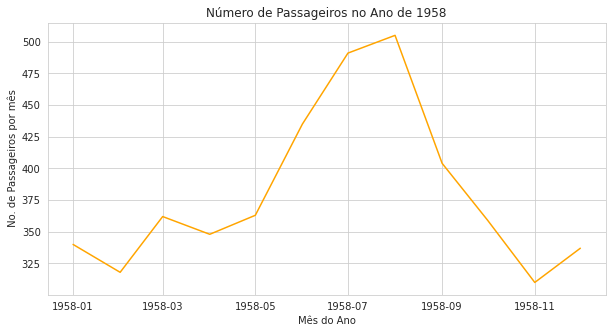

In [14]:
# Visualização em um intervalo de datas específico(escolhi 1958):
ts_datas = ts["1958-1-1":"1958-12-1"]
fig = plt.figure(figsize=(10,5))
plt.plot(ts_datas, color="orange")
plt.title("Número de Passageiros no Ano de 1958")
plt.xlabel("Mês do Ano")
plt.ylabel(" No. de Passageiros por mês")

## **DECOMPOSIÇÃO DA SÉRIE TEMPORAL**

In [15]:
# Import do módulo de decomposição do StatsModels
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
# Criando o objeto de decomposição da série temporal
decomposicao = seasonal_decompose(ts)

In [17]:
# Calculando tendência (No começo e fim dos dados fica como NaN)
# Os dados de tendencia ficam mais ao centro do DataFrame
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

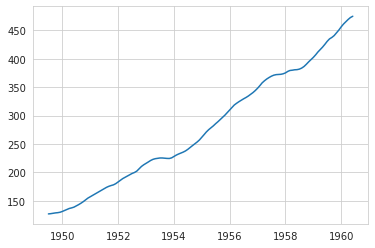

In [18]:
# Plot da tendência 
plt.plot(tendencia)

In [19]:
# Calculando sazonalidade
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

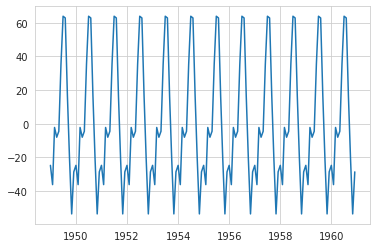

In [20]:
# Plot da sazonalidade(Visualizar melhor os picos de regularidade) 
plt.plot(sazonal)

In [21]:
# Calculando erro (O que sobra quando retiramos a tendência e a sazonalidade)
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

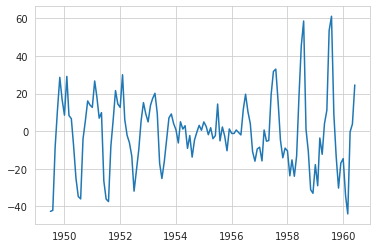

In [22]:
# Plot dos erros 
plt.plot(aleatorio)

## **COMPARAÇÃO DOS DADOS ORIGINAIS, TENDÊNCIA, SAZONALIDADE E ERRO.**

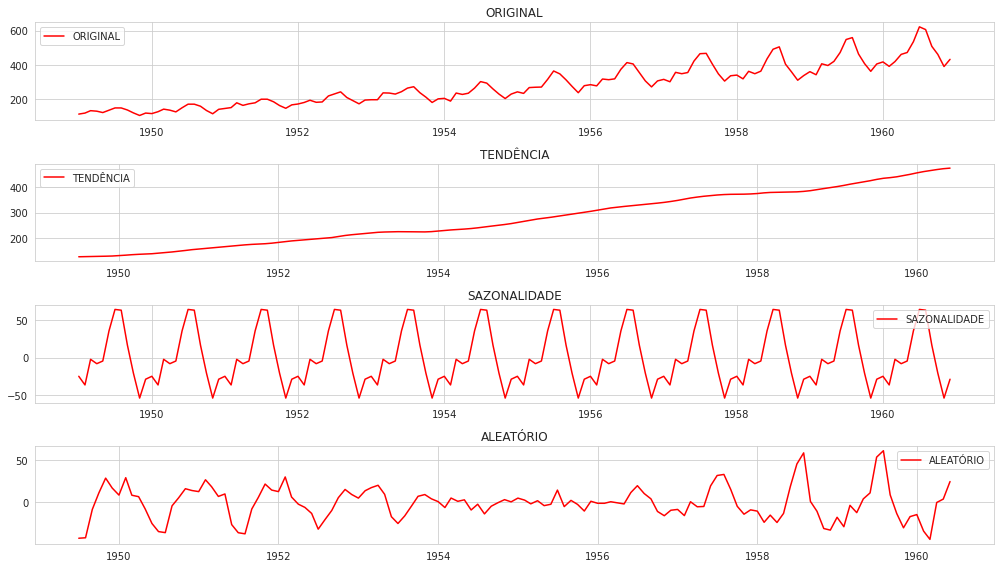

In [23]:
# Subplot para ver os plots próximos:
fig = plt.figure(figsize=(14,8))
# Original
plt.subplot(4,1,1)
plt.title("ORIGINAL")
plt.plot(ts, label="ORIGINAL", color="red")
plt.legend(loc = "best")

# Tendência
plt.subplot(4,1,2)
plt.title("TENDÊNCIA")
plt.plot(tendencia, label="TENDÊNCIA", color="red")
plt.legend(loc = "best")

# Sazonalidade
plt.subplot(4,1,3)
plt.title("SAZONALIDADE")
plt.plot(sazonal, label="SAZONALIDADE", color="red")
plt.legend(loc = "best")

# Erro
plt.subplot(4,1,4)
plt.title("ALEATÓRIO")
plt.plot(aleatorio, label="ALEATÓRIO", color="red")
plt.legend(loc = "best")

# Não deixar os plots grudados: 
plt.tight_layout()

## **PREVISÕES DE SÉRIES TEMPORAIS COM "ARIMA"**

In [24]:
# import do ARIMA (e instalar: pip install pmdarima)
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

### **"MANUAL" ARIMA (INPUT DOS PARÂMETROS)**

In [ ]:
# Criação do modelo ARIMA com os parametros p =2, q = 1, d = 2, treino e DataViz
modelo_manual = ARIMA(ts, order=(2, 1, 2), freq=ts.index.inferred_freq)
# Fit do modelo
modelo_treinado = modelo_manual.fit()

In [26]:
modelo_treinado.summary()
# Quanto menor os Indices "AIC" e "BIC", melhor o modelo
# Afim de melhorar esses índices, testar ccom outros números em P, Q e D.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.715
Date:                Sun, 17 Jan 2021   AIC                           1344.043
Time:                        00:32:14   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5310      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.878      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9097      0.065    -29.548      0.000      -2.036      -1.783
ma.L2.D.#Passengers     0.9996      0.067     14.828      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9060           -0.5281j            1.0486           -0.0840
AR.2            0.9060           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [27]:
# Prever 12 datas futuras (meses):
previsoes = modelo_treinado.forecast(steps=12)[0]
previsoes

array([433.13109777, 450.91078088, 479.84039549, 512.00203509,
       539.34958541, 555.82571014, 558.76661386, 549.29154728,
       531.6671349 , 511.90575462, 496.03412877, 488.5150558 ])

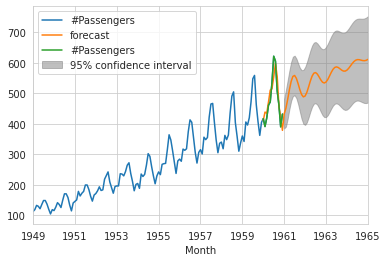

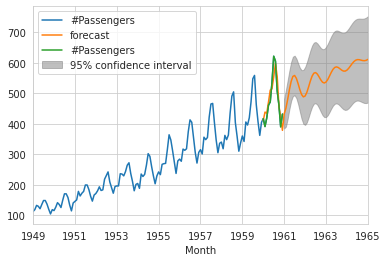

In [28]:
# Plotando as novas previsões + o gráfico antigo 
# (Para usar o gráfico antigo: plot_insample = True)
# Grafico antigo:
eixo = ts.plot()
# A linha verde é porque foi previsto um ano que já existia nos dados
# No caso 1960. A linha azul os dados anteriores, e a linha Amarela a previsão.
modelo_treinado.plot_predict('1960-01-01', '1965-01-01',
                             ax = eixo, plot_insample = True)

### **AUTO ARIMA (ELE CALCULA OS MELHORES PARAMETROS P, Q e D)**

In [29]:
# Uso do AutoArima para a descoberta dos parâmetros:
# m = intervalo que quer prever
# seasonal = True(caso exista efeito sazonal na serie, e nesse caso TEM)
# trace = False (Não gerar saidas durante a busca do melhor modelo)
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)

In [30]:
# dados do modelo_auto:
modelo_auto.summary()
# Podemos observar que o modelo AutoArima se saiu melhor
# (Além de poupar tempo e esforço)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 17 Jan 2021   AIC                           1017.847
Time:                                     00:32:25   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.599      0.000      -1.057      -0.907
sigma2       129.3144     14.557      8.884      0.000     100.784     157.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
proximos_12 = modelo_auto.predict(n_periods = 12)
proximos_12

array([445.6354001 , 420.39577137, 449.19934514, 491.84117289,
       503.39586262, 566.86396361, 654.26178957, 638.59918057,
       540.88549652, 494.12842405, 423.33454967, 465.50944575])